In [1]:
import akshare as ak
import datetime
today = datetime.datetime.now().strftime("%Y%m%d")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 股票

## 信息总览

In [2]:
# 市场总览
stock_sse_summary_df = ak.stock_sse_summary()
stock_sse_summary_df

,项目,股票,科创板,主板
0,流通股本,40759.02,443.21,40315.81
1,总市值,494726.65,50581.51,444145.14
2,平均市盈率,17.06,61.79,15.85
3,上市公司,2057,391,1666
4,上市股票,2099,391,1708
5,流通市值,418177.16,20213.22,397963.94
6,报告时间,20220304,20220304,20220304
8,总股本,46484.32,1349.13,45135.19


In [3]:
# 个股信息
code = "601233"
stock_individual_info_em_df = ak.stock_individual_info_em(symbol=code)
stock_individual_info_em_df

,item,value
0,总市值,46631050994.620003
1,流通市值,44240850255.580002
2,行业,化纤行业
3,上市时间,20110518
4,股票代码,601233
5,股票简称,桐昆股份
6,总股本,2411119493.0
7,流通股,2287531037.0


## 历史行情

In [4]:
code = "601233"
stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol=code, period="daily", start_date="20000101", end_date=today, adjust="qfq")

In [5]:
stock_zh_a_hist_df.columns

Index(['日期', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率'], dtype='object')

In [6]:
x = stock_zh_a_hist_df['日期']
y = stock_zh_a_hist_df['收盘']

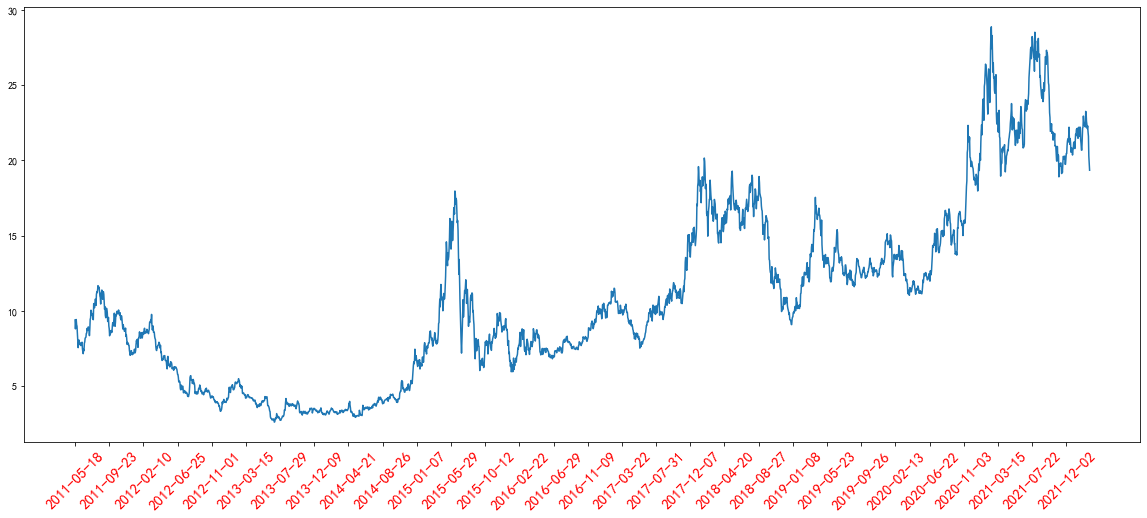

In [7]:
fig = plt.figure(figsize=(20,8))
plt.plot(x,y)
plt.xticks(x,color='red',rotation=45,size = 15)
plt.locator_params(axis='x', nbins=30)
plt.show()

## 财务

In [8]:
# 业绩报表
stock_yjbb_em_df = ak.stock_yjbb_em(date='20210930')
len(stock_yjbb_em_df)

5288

In [9]:
code = '601233'
stock_yjbb_em_df[stock_yjbb_em_df['股票代码'] == code]

,序号,股票代码,股票简称,每股收益,营业收入-营业收入,营业收入-同比增长,营业收入-季度环比增长,净利润-净利润,净利润-同比增长,净利润-季度环比增长,每股净资产,净资产收益率,每股经营现金流量,销售毛利率,所处行业,最新公告日期
576,577,601233,桐昆股份,2.71,5.034752e+10,53.407727,5.8196,6.161227e+09,242.67,-16.1059,14.373974,20.78,0.121901,11.116929,化纤行业,2021-10-30 00:00:00


In [10]:
# 业绩预告
stock_yjyg_em_df = ak.stock_yjyg_em(date="20211231")
len(stock_yjyg_em_df)

8141

In [11]:
code = '601233'
stock_yjyg_em_df[stock_yjyg_em_df['股票代码'] == code]

,序号,股票代码,股票简称,预测指标,业绩变动,预测数值,业绩变动幅度,业绩变动原因,预告类型,上年同期值,公告日期
467,468,601233,桐昆股份,归属于上市公司股东的净利润,"预计2021年1-12月归属于上市公司股东的净利润盈利:720,000万元至800,000万...",7.600000e+09,166.990,"(一)报告期内,聚酯长丝行业集中度持续提高,景气度逐步回升,下游纺织终端消费持续恢复,公司差...",预增,2.846531e+09,2022-01-29 00:00:00
468,469,601233,桐昆股份,扣除非经常性损益后的净利润,"预计2021年1-12月扣除非经常性损益后的净利润盈利:719,000万元至799,000万...",7.590000e+09,174.315,"(一)报告期内,聚酯长丝行业集中度持续提高,景气度逐步回升,下游纺织终端消费持续恢复,公司差...",预增,2.766894e+09,2022-01-29 00:00:00


## 资金流向

In [12]:
# 个股资金流
code = '601233'
stock_individual_fund_flow_df = ak.stock_individual_fund_flow(stock=code, market="sh")

In [13]:
stock_individual_fund_flow_df[-10:]

,日期,收盘价,涨跌幅,主力净流入-净额,主力净流入-净占比,超大单净流入-净额,超大单净流入-净占比,大单净流入-净额,大单净流入-净占比,中单净流入-净额,中单净流入-净占比,小单净流入-净额,小单净流入-净占比
92,2022-02-21,23.19,-0.26,-42315612.0,-4.31,-124858078.0,-12.70,82542466.0,8.40,48482864.0,4.93,-6167251.0,-0.63
93,2022-02-22,22.60,-2.54,-46661225.0,-8.37,-62941626.0,-11.28,16280401.0,2.92,15536125.0,2.79,31125100.0,5.58
94,2022-02-23,22.39,-0.93,-49412293.0,-7.43,-49386439.0,-7.42,-25854.0,-0.00,33955632.0,5.10,15456661.0,2.32
95,2022-02-24,22.11,-1.25,-51574562.0,-6.22,-27071143.0,-3.27,-24503419.0,-2.96,9537298.0,1.15,42037260.0,5.07
96,2022-02-25,22.29,0.81,21807398.0,4.10,-1818622.0,-0.34,23626020.0,4.45,-14253797.0,-2.68,-7553600.0,-1.42
97,2022-02-28,21.88,-1.84,-57515828.0,-9.57,-58769553.0,-9.78,1253725.0,0.21,15508373.0,2.58,42007455.0,6.99
98,2022-03-01,21.60,-1.28,-71424976.0,-10.54,-54263047.0,-8.01,-17161929.0,-2.53,-160147.0,-0.02,71585122.0,10.56
99,2022-03-02,20.28,-6.11,-162415495.0,-11.08,-85501239.0,-5.83,-76914256.0,-5.25,63077600.0,4.30,99337888.0,6.78
100,2022-03-03,19.74,-2.66,-27909631.0,-2.93,-9338484.0,-0.98,-18571147.0,-1.95,-18185952.0,-1.91,46095568.0,4.84
101,2022-03-04,19.34,-2.03,-102902561.0,-13.31,-53279663.0,-6.89,-49622898.0,-6.42,43854274.0,5.67,59048286.0,7.64


In [14]:
# 板块资金流
# indicator：choice of {"今日", "5日", "10日"}
# sector_type：choice of {"行业资金流": "2", "概念资金流": "3", "地域资金流": "1"}
stock_sector_fund_flow_rank_df = ak.stock_sector_fund_flow_rank(indicator="今日", sector_type='行业资金流')
stock_sector_fund_flow_rank_df['名称'].values

array(['医药商业', '半导体', '游戏', '教育', '旅游酒店', '专业服务', '公用事业', '化学制药', '家用轻工',
       '风电设备', '房地产服务', '汽车服务', '电子化学品', '珠宝首饰', '通信服务', '装修装饰', '包装材料',
       '食品饮料', '仪器仪表', '航空机场', '铁路公路', '装修建材', '美容护理', '文化传媒', '橡胶制品',
       '交运设备', '纺织服装', '医疗器械', '煤炭行业', '多元金融', '医疗服务', '化纤行业', '商业百货',
       '造纸印刷', '电机', '工程咨询服务', '电力行业', '环保行业', '贵金属', '农药兽药', '燃气',
       '船舶制造', '塑料制品', '生物制品', '综合行业', '工程机械', '贸易行业', '玻璃玻纤', '水泥建材',
       '电源设备', '农牧饲渔', '房地产开发', '物流行业', '航运港口', '计算机设备', '保险', '非金属材料',
       '家电行业', '石油行业', '电子元件', '光伏设备', '采掘行业', '钢铁行业', '酿酒行业', '电网设备',
       '通用设备', '航天航空', '光学光电子', '通信设备', '化学原料', '专用设备', '有色金属', '银行',
       '中药', '消费电子', '化肥行业', '汽车零部件', '证券', '工程建设', '能源金属', '软件开发', '小金属',
       '汽车整车', '化学制品', '互联网服务', '电池'], dtype=object)

In [15]:
stock_sector_fund_flow_rank_df[stock_sector_fund_flow_rank_df['名称'] == '化纤行业']

,序号,名称,今日涨跌幅,今日主力净流入-净额,今日主力净流入-净占比,今日超大单净流入-净额,今日超大单净流入-净占比,今日大单净流入-净额,今日大单净流入-净占比,今日中单净流入-净额,今日中单净流入-净占比,今日小单净流入-净额,今日小单净流入-净占比,今日主力净流入最大股
31,32,化纤行业,-1.2,-226823984.0,-3.32,-60583584.0,-0.89,-166240400.0,-2.44,116404272.0,1.71,110419712.0,1.62,恒力石化


## 概念板块

In [16]:
# 获取概念板块列表
stock_board_concept_name_em_df = ak.stock_board_concept_name_em()
stock_board_concept_name_em_df

,排名,板块名称,板块代码,最新价,涨跌额,涨跌幅,总市值,换手率,上涨家数,下跌家数,领涨股票,领涨股票-涨跌幅
0,1,辅助生殖,BK0939,1266.17,40.15,3.27,476023120000,4.35,26,7,达嘉维康,19.99
1,2,核污染防治,BK0983,1210.16,38.11,3.25,296096288000,3.27,12,6,北化股份,10.02
2,3,NFT概念,BK0997,1194.22,23.32,1.99,227105545000,4.88,17,10,元隆雅图,9.98
3,4,虚拟数字人,BK1055,856.14,16.56,1.97,381720080000,4.60,18,9,中文在线,10.55
4,5,云游戏,BK0903,990.20,16.88,1.73,301480560000,3.52,16,10,中青宝,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
353,354,天然气,BK0843,1242.34,-38.97,-3.04,3040109376000,1.50,13,102,数字政通,7.31
354,355,页岩气,BK0603,1726.69,-71.73,-3.99,2021471952000,1.06,5,32,准油股份,9.97
355,356,可燃冰,BK0818,1191.59,-51.80,-4.17,335142240000,2.37,1,14,准油股份,9.97
356,357,油气设服,BK0606,1520.35,-71.79,-4.51,757182016000,3.94,5,49,准油股份,9.97


In [17]:
stock_board_concept_name_em_df['板块名称'].values

array(['辅助生殖', '核污染防治', 'NFT概念', '虚拟数字人', '云游戏', '疫苗冷链', '盲盒经济', '地塞米松',
       '医疗美容', '婴童概念', '昨日连板_含一字', '气溶胶检测', '宠物经济', '鸡肉概念', '毛发医疗',
       '单抗概念', '流感', '肝素概念', '免疫治疗', '超级真菌', '青蒿素', '维生素', '元宇宙概念',
       '基因测序', '电子竞技', '互联医疗', '健康中国', '拼多多概念', '知识产权', '中药概念', '新冠检测',
       '养老概念', '体外诊断', '幽门螺杆菌概念', '生物疫苗', '病毒防治', '医疗器械概念', '代糖概念',
       '水产养殖', '精准医疗', '猪肉概念', '汽车芯片', '手游概念', 'CAR-T细胞疗法', '快手概念',
       '阿兹海默', 'CRO', '网络游戏', 'HIT电池', '独家药品', '啤酒概念', '影视概念', '职业教育',
       '乳业', '化妆品概念', '快递概念', '商汤概念', '长寿药', '预制菜概念', 'GDR', '草甘膦',
       '重组蛋白', '中芯概念', '在线教育', '数字阅读', 'ST股', '新冠药物', '字节概念', 'EDA概念',
       '北交所概念', 'IGBT概念', '转基因', '网红直播', '数据安全', '在线旅游', '内贸流通', '冷链物流',
       'DRG/DIP', '注册制次新股', '次新股', '远程办公', '抖音小店', '半导体概念', '第三代半导体',
       '央视50_', '发电机概念', 'B股', '农业种植', '国产芯片', '无线耳机', '创业成份', '广电', '白酒',
       '百元股', '降解塑料', '宁组合', '电商概念', '光刻胶', '送转预期', '沪企改革', '碳化硅', '医废处理',
       'HS300_', '深证100R', '社区团购', 'AB股', '消毒剂', '净水概念', '电子烟', '数字孪生',
       '

In [18]:
# 概念成分股
stock_board_concept_cons_em_df = ak.stock_board_concept_cons_em(symbol="黄金概念")
stock_board_concept_cons_em_df

,序号,代码,名称,最新价,涨跌幅,涨跌额,成交量,成交额,振幅,最高,最低,今开,昨收,换手率,市盈率-动态,市净率
0,1,600766,*ST园城,5.41,5.05,0.26,86208,4.598583e+07,5.24,5.41,5.14,5.17,5.15,3.85,232.22,20.46
1,2,000587,*ST金洲,1.67,0.60,0.01,106196,1.764889e+07,3.01,1.69,1.64,1.65,1.66,0.88,-5.17,-20.04
2,3,600385,*ST金泰,7.01,0.57,0.04,6634,4.607310e+06,2.73,7.04,6.85,6.97,6.97,0.46,-519.05,89.09
3,4,600988,赤峰黄金,15.77,0.25,0.04,596032,9.467230e+08,2.99,16.17,15.70,16.00,15.73,3.88,35.72,5.67
4,5,600655,豫园股份,10.46,0.19,0.02,120059,1.249902e+08,2.87,10.53,10.23,10.35,10.44,0.31,16.95,1.22
5,6,000975,银泰黄金,9.20,0.11,0.01,406585,3.774425e+08,2.94,9.43,9.16,9.28,9.19,1.66,18.46,2.50
6,7,002715,登云股份,13.33,-0.30,-0.04,13332,1.772826e+07,3.89,13.62,13.10,13.40,13.37,0.97,941.27,3.62
7,8,002731,萃华珠宝,10.89,-0.37,-0.04,75922,8.309818e+07,4.03,11.28,10.84,11.27,10.93,3.17,45.09,2.14
8,9,600547,山东黄金,20.23,-0.83,-0.17,337810,6.898710e+08,2.35,20.70,20.22,20.56,20.40,0.93,-54.11,3.56
9,10,000688,国城矿业,17.67,-0.95,-0.17,96213,1.701681e+08,3.36,18.05,17.45,17.93,17.84,0.85,97.48,8.31


# 期权

## 到期日

In [19]:
option_sse_list_sina_df = ak.option_sse_list_sina(symbol="50ETF", exchange="null")
option_sse_list_sina_df

['202203', '202204', '202206', '202209']

## 期权合约列表

In [20]:
# symbol:choice of {"看涨期权", "看跌期权"}
call_option_sse_codes_sina_df = ak.option_sse_codes_sina(symbol = '看涨期权',trade_date="202203", underlying="510050")
put_option_sse_codes_sina_df = ak.option_sse_codes_sina(symbol = '看跌期权',trade_date="202203", underlying="510050")
call_list = call_option_sse_codes_sina_df['期权代码'].values
put_list = put_option_sse_codes_sina_df['期权代码'].values

## 希腊字母

In [21]:
# 希腊字母
option_sse_greeks_sina_df = ak.option_sse_greeks_sina(symbol=call_list[0])
option_sse_greeks_sina_df

,字段,值
0,期权合约简称,50ETF购3月2800
1,成交量,1046
2,Delta,0.9935
3,Gamma,0.1703
4,Theta,-0.1295
5,Vega,0.0126
6,隐含波动率,0.1895
7,最高价,0.2666
8,最低价,0.2380
9,交易代码,510050C2203M02800


## 隐含波动率微笑

In [22]:
def get_T(code):
    df = pd.DataFrame([])
    for i in code:
        Greek_value = ak.option_sse_greeks_sina(symbol=i)
        df = df.append(Greek_value['值'])
    df.columns = Greek_value['字段']
    df['隐含波动率'] = df['隐含波动率'].astype('float')
    return df

In [23]:
df_call = get_T(call_list)
df_put = get_T(put_list)

In [24]:
df_call

字段,期权合约简称,成交量,Delta,Gamma,Theta,Vega,隐含波动率,最高价,最低价,交易代码,行权价,最新价,理论价值
值,50ETF购3月2800,1046,0.9935,0.1703,-0.1295,0.0126,0.1895,0.2666,0.2380,510050C2203M02800,2.8000,0.2529,0.252
值,50ETF购3月2814A,225,0.9905,0.2404,-0.1373,0.0178,0.1381,0.2471,0.2269,510050C2203A02850,2.8140,0.2380,0.2382
值,50ETF购3月2850,2983,0.9761,0.5278,-0.1683,0.039,0.1960,0.2156,0.1913,510050C2203M02850,2.8500,0.2055,0.2029
值,50ETF购3月2863A,896,0.9678,0.6772,-0.184,0.0501,0.2053,0.2025,0.1800,510050C2203A02900,2.8630,0.1944,0.1903
值,50ETF购3月2900,10393,0.9309,1.2489,-0.2432,0.0924,0.1836,0.1722,0.1459,510050C2203M02900,2.9000,0.1587,0.1553
值,50ETF购3月2912A,2694,0.9138,1.4777,-0.2664,0.1093,0.1807,0.1560,0.1356,510050C2203A02950,2.9120,0.1478,0.1443
值,50ETF购3月2950,33988,0.8397,2.2881,-0.347,0.1693,0.1782,0.1240,0.1033,510050C2203M02950,2.9500,0.1158,0.1113
值,50ETF购3月2962A,15226,0.8098,2.5506,-0.3723,0.1887,0.1808,0.1178,0.0948,510050C2203A03000,2.9620,0.1070,0.1015
值,50ETF购3月3000,177442,0.6958,3.2862,-0.4396,0.2431,0.1651,0.0844,0.0684,510050C2203M03000,3.0000,0.0762,0.0733
值,50ETF购3月3061A,82937,0.4747,3.7397,-0.4634,0.2767,0.1620,0.0460,0.0361,510050C2203A03100,3.0610,0.0408,0.0384


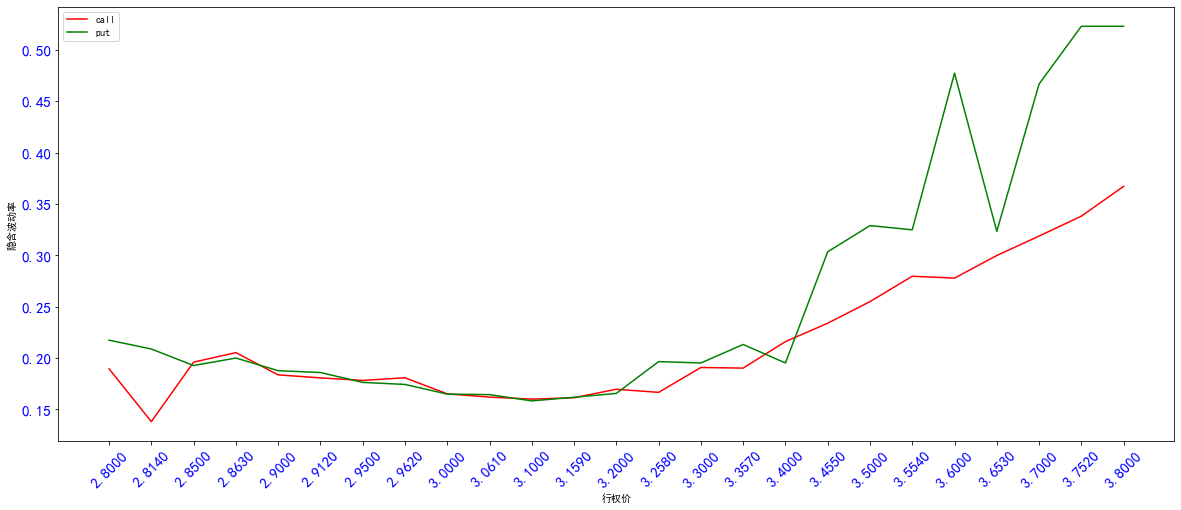

In [25]:
fig = plt.figure(figsize=(20,8))
plt.plot(df_call['行权价'],df_call['隐含波动率'],label='call',color='red')
plt.plot(df_put['行权价'],df_put['隐含波动率'],label='put',color='green')
plt.xlabel('行权价')
plt.ylabel('隐含波动率',rotation=90)
plt.xticks(df_call['行权价'],color='blue',rotation=45,size=15)
plt.yticks(color='blue',rotation=0,size=15)
plt.legend(loc='best')
plt.show()